# Customer Churn Prediction – Telco Dataset

## 1. Objective
The goal of this project is to predict whether a customer will *churn* (discontinue service) based on their demographic, account, and service usage data.  
This helps telecom companies identify high-risk customers and take proactive retention measures.

*Business Impact:*  
Reducing churn improves customer lifetime value and directly increases recurring revenue.

## 2. Importing Libraries and Loading Dataset

We start by importing the required Python libraries such as pandas, numpy, matplotlib, and seaborn for data analysis and visualization.

In [92]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

## 3. Data Understanding

We begin by inspecting the dataset structure — looking at rows, columns, data types, and missing values.  
This helps us understand the overall shape of data and identify any potential issues.

*Key steps:*
- Display first 5 rows using .head()
- Check total rows and columns using .shape
- Examine data types using .dtypes
- Get basic statistical summary using .describe()

## Loading the data file

In [93]:
telco_base_data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

## Looking at the top 5 records of the data

In [94]:
telco_base_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Checking the various attributes of data like shape (rows and cols), Columns, datatypes

In [95]:
telco_base_data.shape

(7043, 21)

In [96]:
telco_base_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [97]:
# Checking the data types of all the columns
telco_base_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [98]:
# Checking the descriptive statistics of numeric variables
telco_base_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000



## - SeniorCitizen is actually a categorical hence the 25%-50%-75% distribution is not propoer

## - 75% customers have tenure less than 55 months

## - Average Monthly charges are USD 64.76 whereas 25% customers pay more than USD 89.85 per month

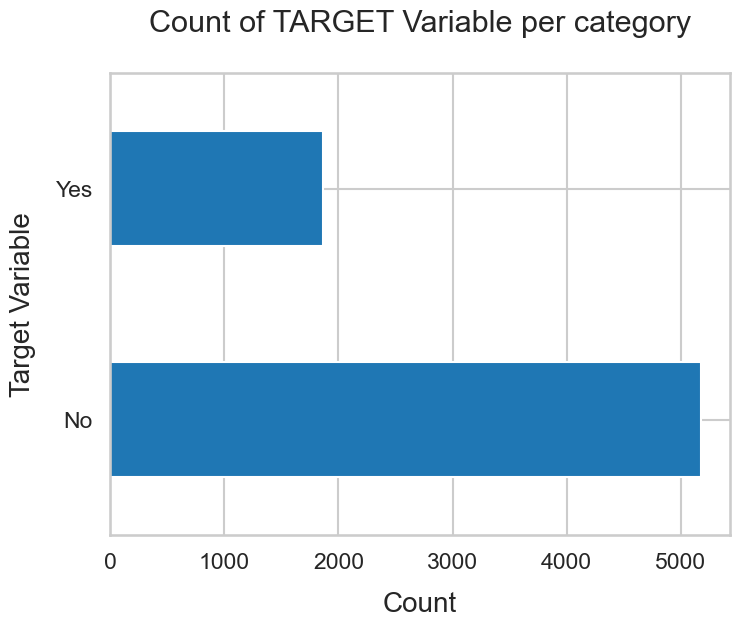

In [99]:
telco_base_data['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category");

In [100]:
100*telco_base_data['Churn'].value_counts()/len(telco_base_data['Churn'])

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

In [101]:
telco_base_data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

## - Data is highly imbalanced, ratio = 73:27
## - So we analyse the data with other features while taking the target values separately to get some insights.

In [102]:
# Concise Summary of the dataframe, as we have too many columns, we are using the verbose = True mode
telco_base_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


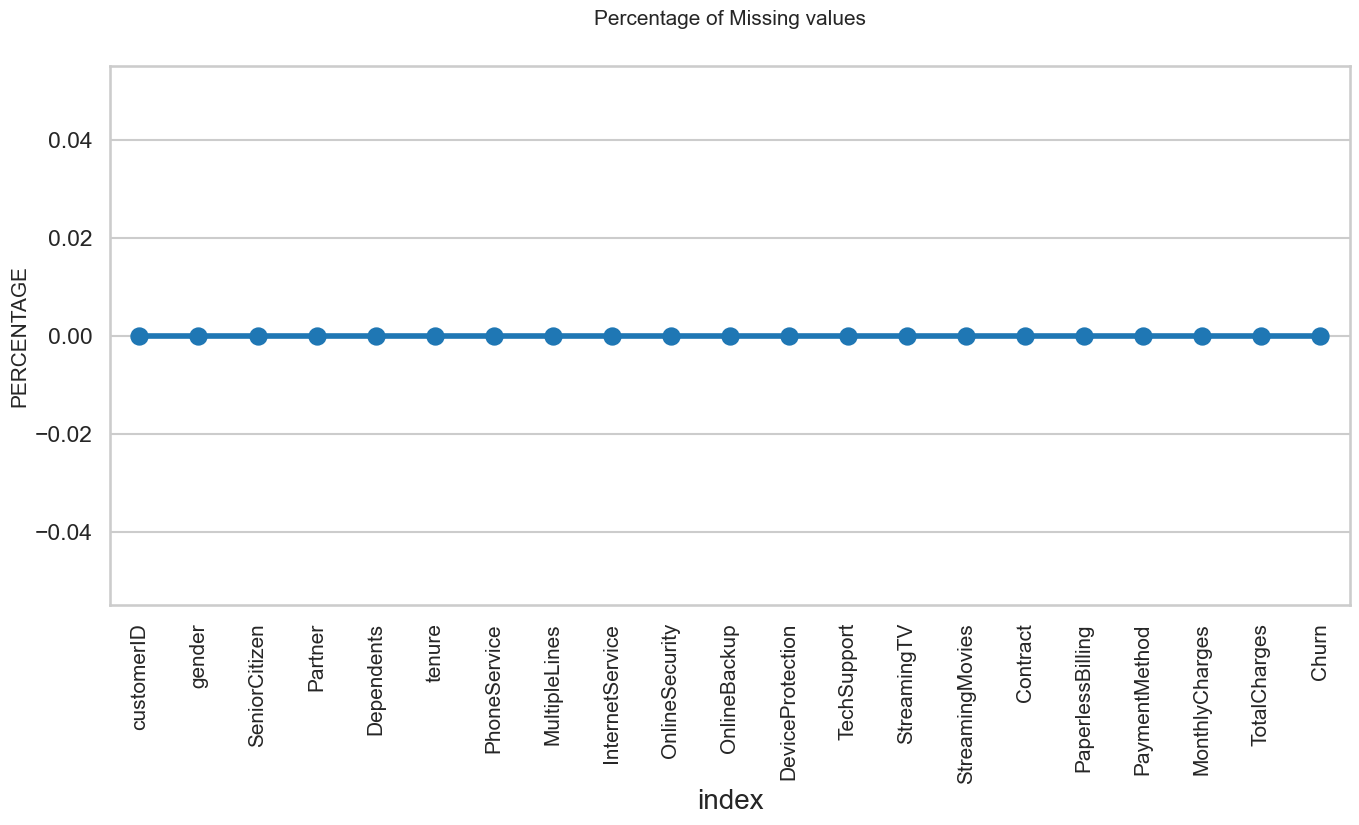

In [103]:
missing = pd.DataFrame((telco_base_data.isnull().sum())*100/telco_base_data.shape[0]).reset_index()
plt.figure(figsize=(16,7))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =15)
plt.title("Percentage of Missing values",fontsize=15)
plt.ylabel("PERCENTAGE",fontsize=15)
plt.show()

## Missing Data - Initial Intuition
- Here, we don't have any missing data.
General Thumb Rules:

- For features with less missing values- can use regression to predict the missing values or fill with the mean of the values present, depending on the feature.
- For features with very high number of missing values- it is better to drop those columns as they give very less insight on analysis.
- As there's no thumb rule on what criteria do we delete the columns with high number of missing values, but generally you can delete the columns, if you have more than 30-40% of missing values. 

## 4. Data Cleaning and Preparation

Before analysis, we handle missing values, inconsistent data types, and categorical encodings.

*Actions performed:*
- Convert TotalCharges to numeric type.
- Handle missing or blank entries.
- Encode categorical variables.
- Drop irrelevant columns like customerID.


### 1. Create a copy of base data for manupulation & processing

In [104]:
telco_data= telco_base_data.copy()

### 2. Total Charges should be numeric amount .Lets convert it to a numeric data type

In [105]:
telco_data.TotalCharges = pd.to_numeric(telco_data.TotalCharges, errors='coerce')
telco_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

### 3. As we can see there are 11 missing values in TotalCharges column. Lets check these records

In [106]:
telco_data.loc[telco_data['TotalCharges'].isnull()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [107]:
telco_data.isnull().sum() * 100 / len(telco_data['TotalCharges'])

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64

### 4. Missing value Treatment
since the % of these records comapared to total dataset is very low i.e 0.15%, it is safe to ignore them from processing.


In [108]:
# Removing the missing values
telco_data.dropna(how='any', inplace = True)

## 5. Outliers Treatment

In [109]:
cols=['MonthlyCharges', 'TotalCharges']
cols

['MonthlyCharges', 'TotalCharges']

In [110]:
def outlier_detect(df,col):
    plt.figure(figsize=(5,3))
    sns.boxplot(y=df[col])
    plt.title(f"Distribution of {col}")
    plt.ylabel(col)
    plt.show()
    

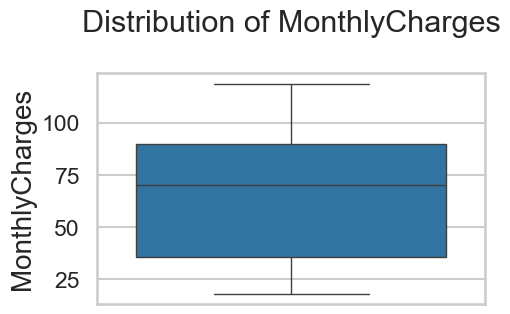

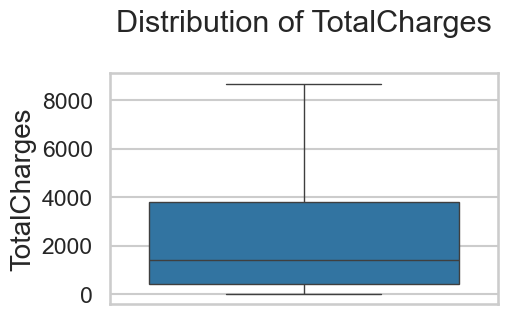

In [111]:
for i in cols:
    outlier_detect(telco_data,i)

No outlier is seen !!

### 6. Divide customers into bins based on tenure e.g for tenure<12 months: assign a tenure group if 1-12, for tenure between 1 to 2 yrs, tenure group of 13-24 and so on...

In [112]:
# getting the maximum tenure
telco_data['tenure'].max()

72

In [113]:
# Group the tenure ib bins of 12 months 
labels = ['{0}-{1}'.format(i,i+11) for i in range(1,72,12)]
telco_data['tenure_group']= pd.cut(telco_data.tenure, range(1, 80, 12), right=False, labels = labels)

In [114]:
telco_data['tenure_group'].value_counts()

tenure_group
1-12     2175
61-72    1407
13-24    1024
25-36     832
49-60     832
37-48     762
Name: count, dtype: int64

### 7. Remove column not required for processing

In [115]:
# drop column customerID and tenure 
telco_data.drop(columns=['customerID','tenure'],axis =1, inplace = True)
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12


## 5. Exploratory Data Analysis (EDA)

EDA helps identify patterns, correlations, and insights about customer behavior.

*Steps:*
- Visualize churn distribution.
- Examine churn rate across categories (e.g., gender, contract type, internet service).
- Plot correlations between numerical features.
- Observe key trends affecting churn.


### **1** Plot distribution of individual predictors by churn

### Univariate Analysis

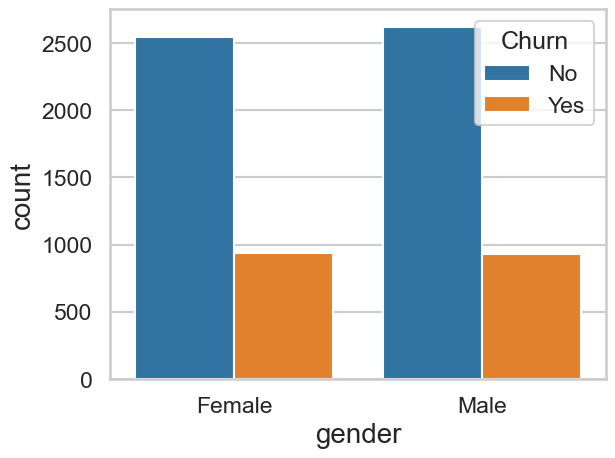

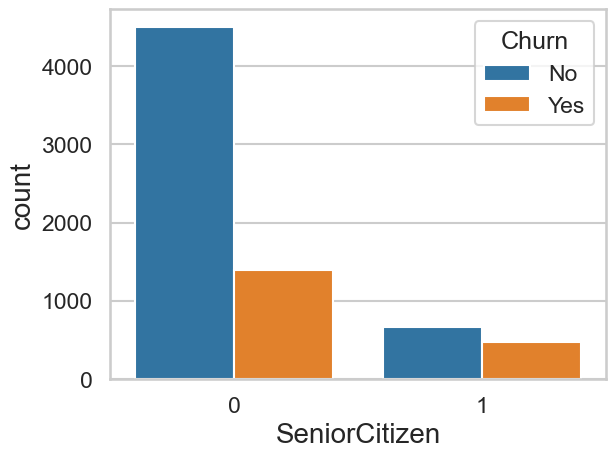

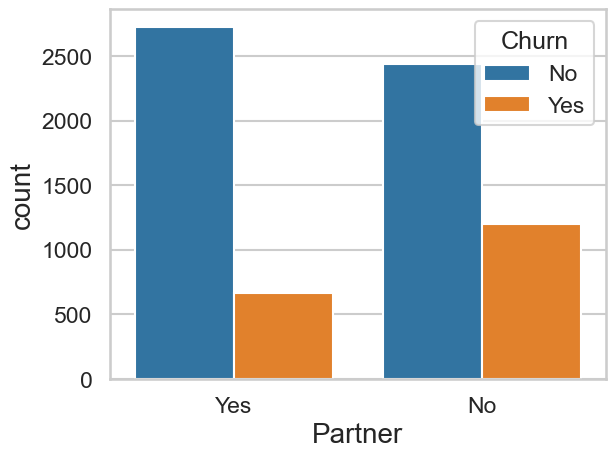

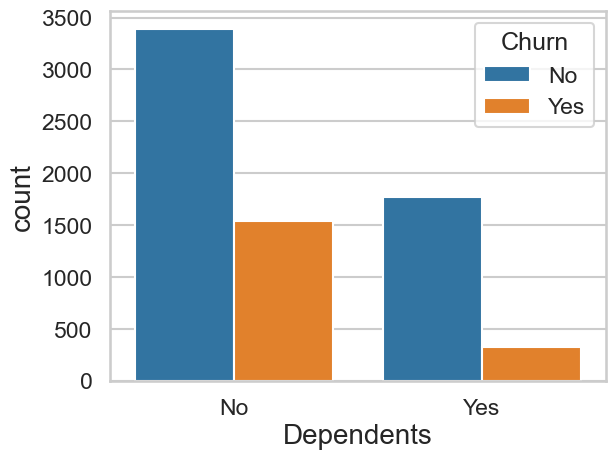

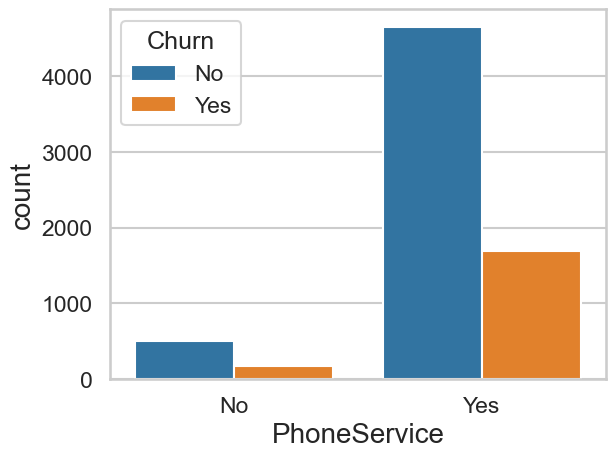

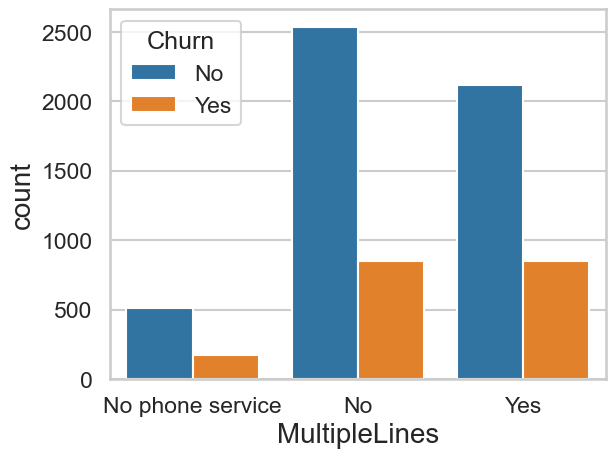

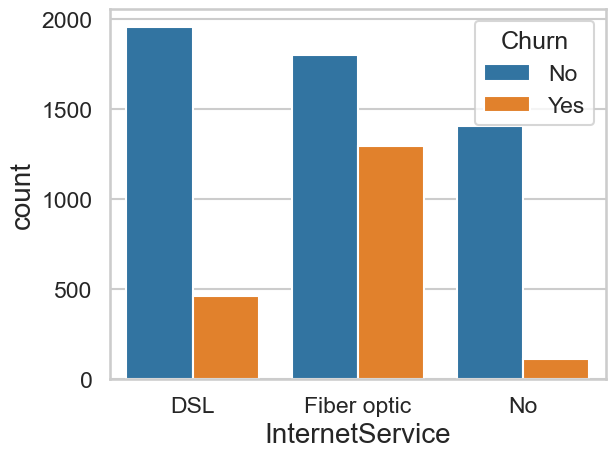

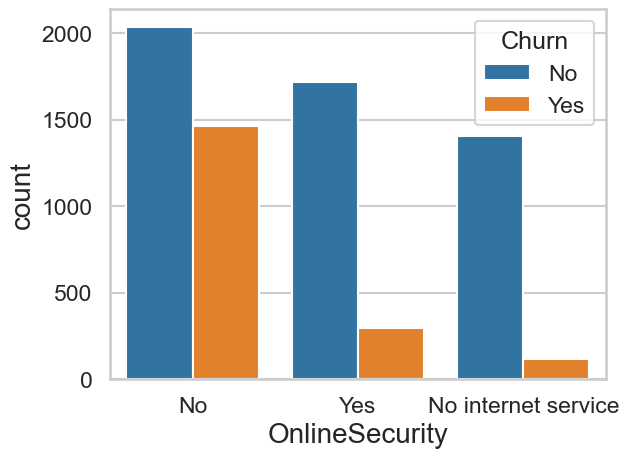

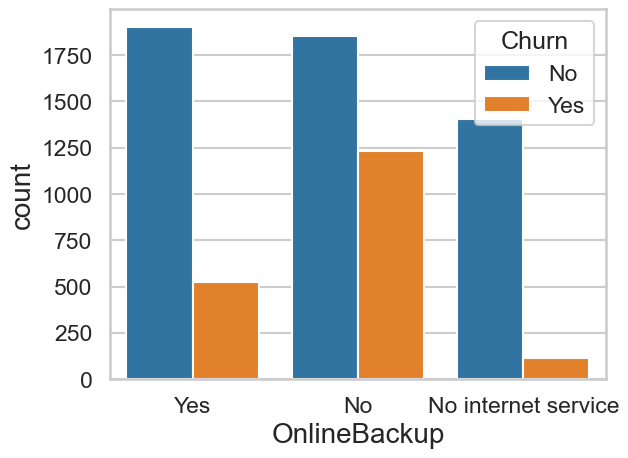

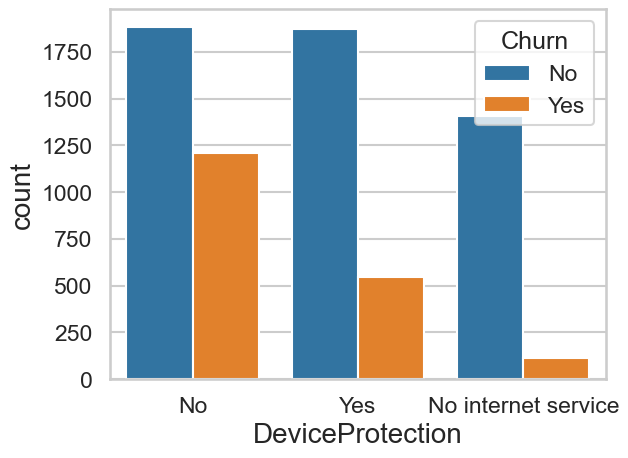

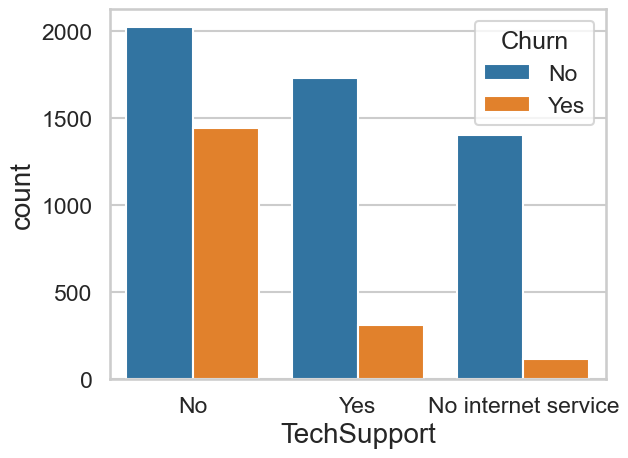

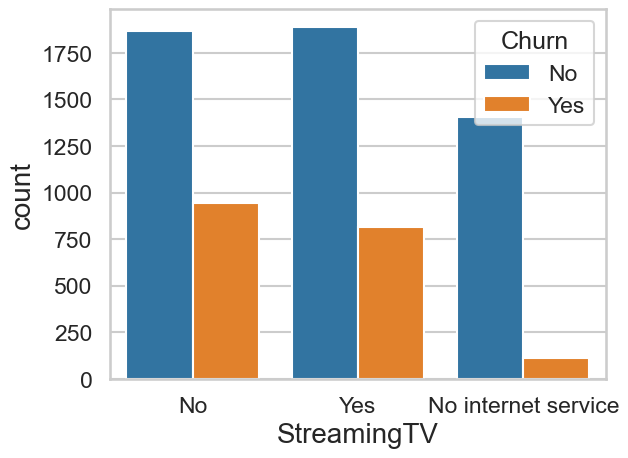

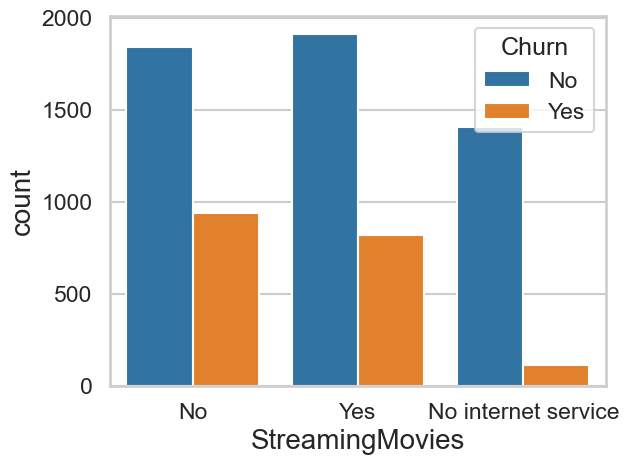

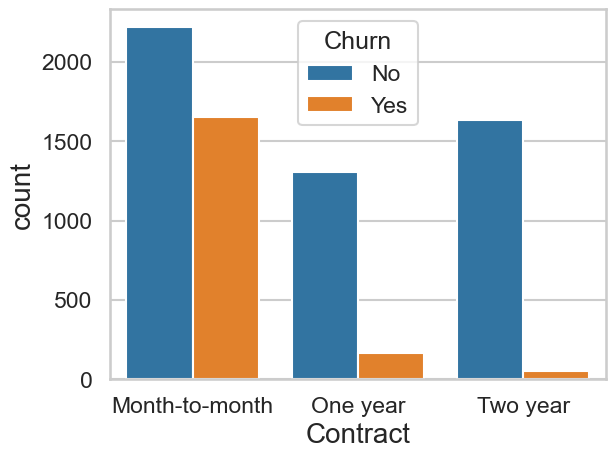

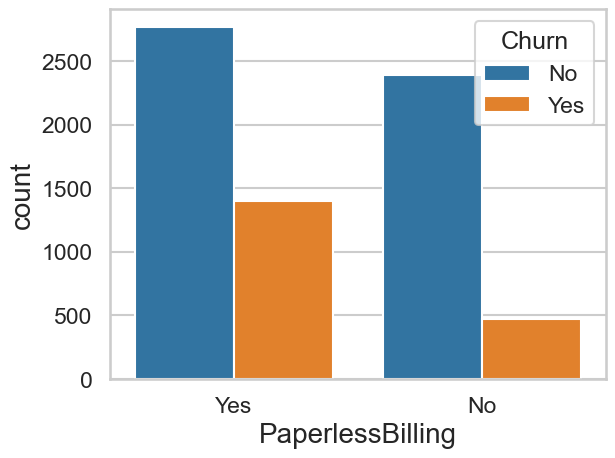

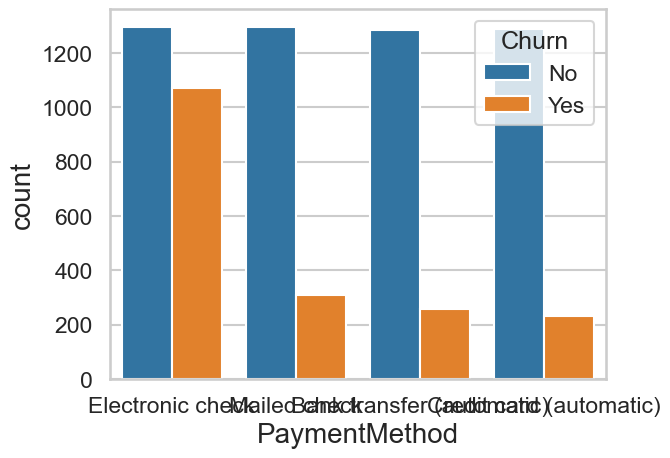

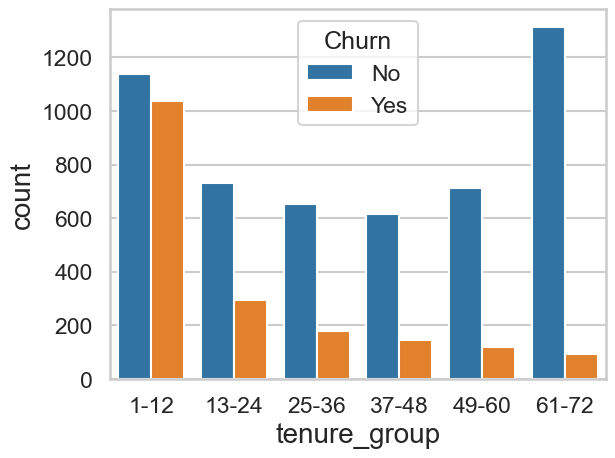

In [116]:
for i,predictor in enumerate(telco_data.drop(columns=['Churn','TotalCharges','MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data = telco_data,x=predictor, hue ='Churn')

### 2 . Convert the target variable 'Churn' in a binary numeric variable i.e Yes = 1 ;No=0

In [117]:
telco_data['Churn']=np.where(telco_data['Churn']=='Yes',1,0)

In [118]:
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1-12


### 3. Convert all the categorcial varibales into dummy variables

In [119]:
telco_data_dummies = pd.get_dummies(telco_data ).astype(int)
telco_data_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,29,29,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56,1889,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53,108,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42,1840,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70,151,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


### 4. Relationship between Monthly Charges and Total Charges

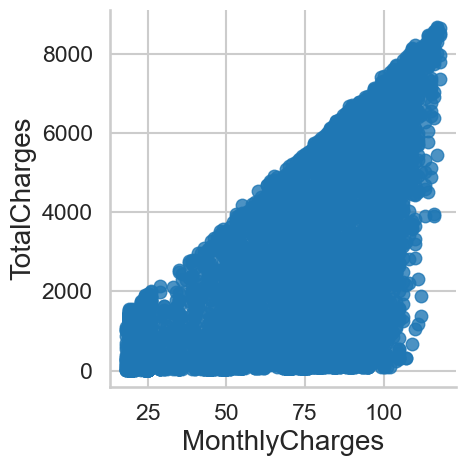

In [120]:
sns.lmplot(data=telco_data_dummies,x='MonthlyCharges', y='TotalCharges', fit_reg=False)

### Total charges increases as Monthly Charges increase - as expected

### 5. Churn by Monthly Charges and Total Charges

C:\Users\91620\AppData\Local\Temp\ipykernel_11996\1716194608.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies['Churn']==0)], color='Red', shade = True)
C:\Users\91620\AppData\Local\Temp\ipykernel_11996\1716194608.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  mth= sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies['Churn']==1)],ax =mth , color='Blue',shade=True)


Text(0.5, 1.0, 'Monthly charges by churn')

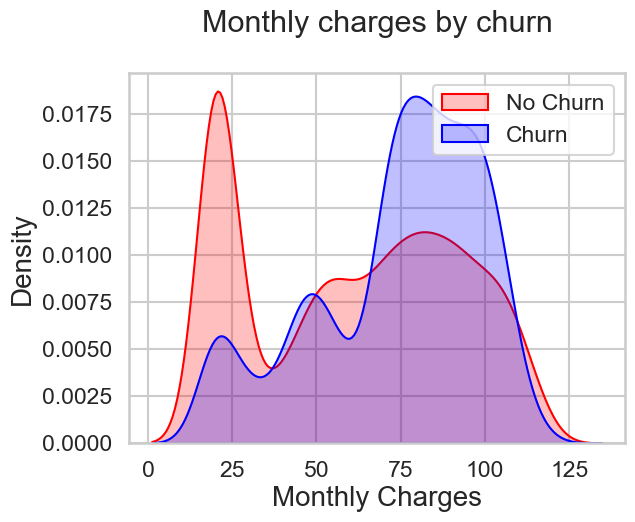

In [121]:
mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies['Churn']==0)], color='Red', shade = True)
mth= sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies['Churn']==1)],ax =mth , color='Blue',shade=True)
mth.legend(['No Churn','Churn'],loc='upper right')
mth.set_ylabel('Density')
mth.set_xlabel('Monthly Charges')
mth.set_title('Monthly charges by churn') 


# insight : 
### Churn is high when Monthly charges are high.

C:\Users\91620\AppData\Local\Temp\ipykernel_11996\3078503694.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  nth = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 0) ],
C:\Users\91620\AppData\Local\Temp\ipykernel_11996\3078503694.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  nth = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 1) ],


Text(0.5, 1.0, 'Total charges by churn')

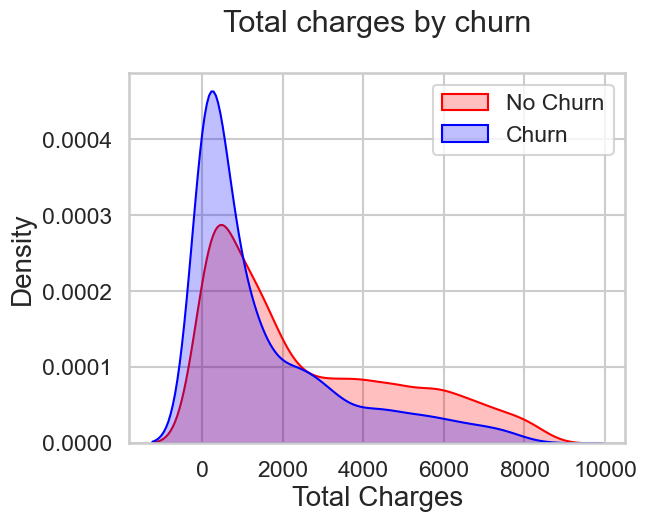

In [122]:
nth = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 0) ],
                color="Red", shade = True)
nth = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 1) ],
                ax =nth, color="Blue", shade= True)
nth.legend(["No Churn","Churn"],loc='upper right')
nth.set_ylabel('Density')
nth.set_xlabel('Total Charges')
nth.set_title('Total charges by churn')

## Surprising insight : as higher Churn at lower Total Charges
however if we combine the insights of 3 parameters , i.e Tenure,Monthly Charges & Total Charges. 
we can conclude that all these factor : **Higher Monthly Charge**, **Lower tenure** and **Lower Total Charge** are linked to **High Churn**


# 6. Build a corelation of all predictors with 'Churn'

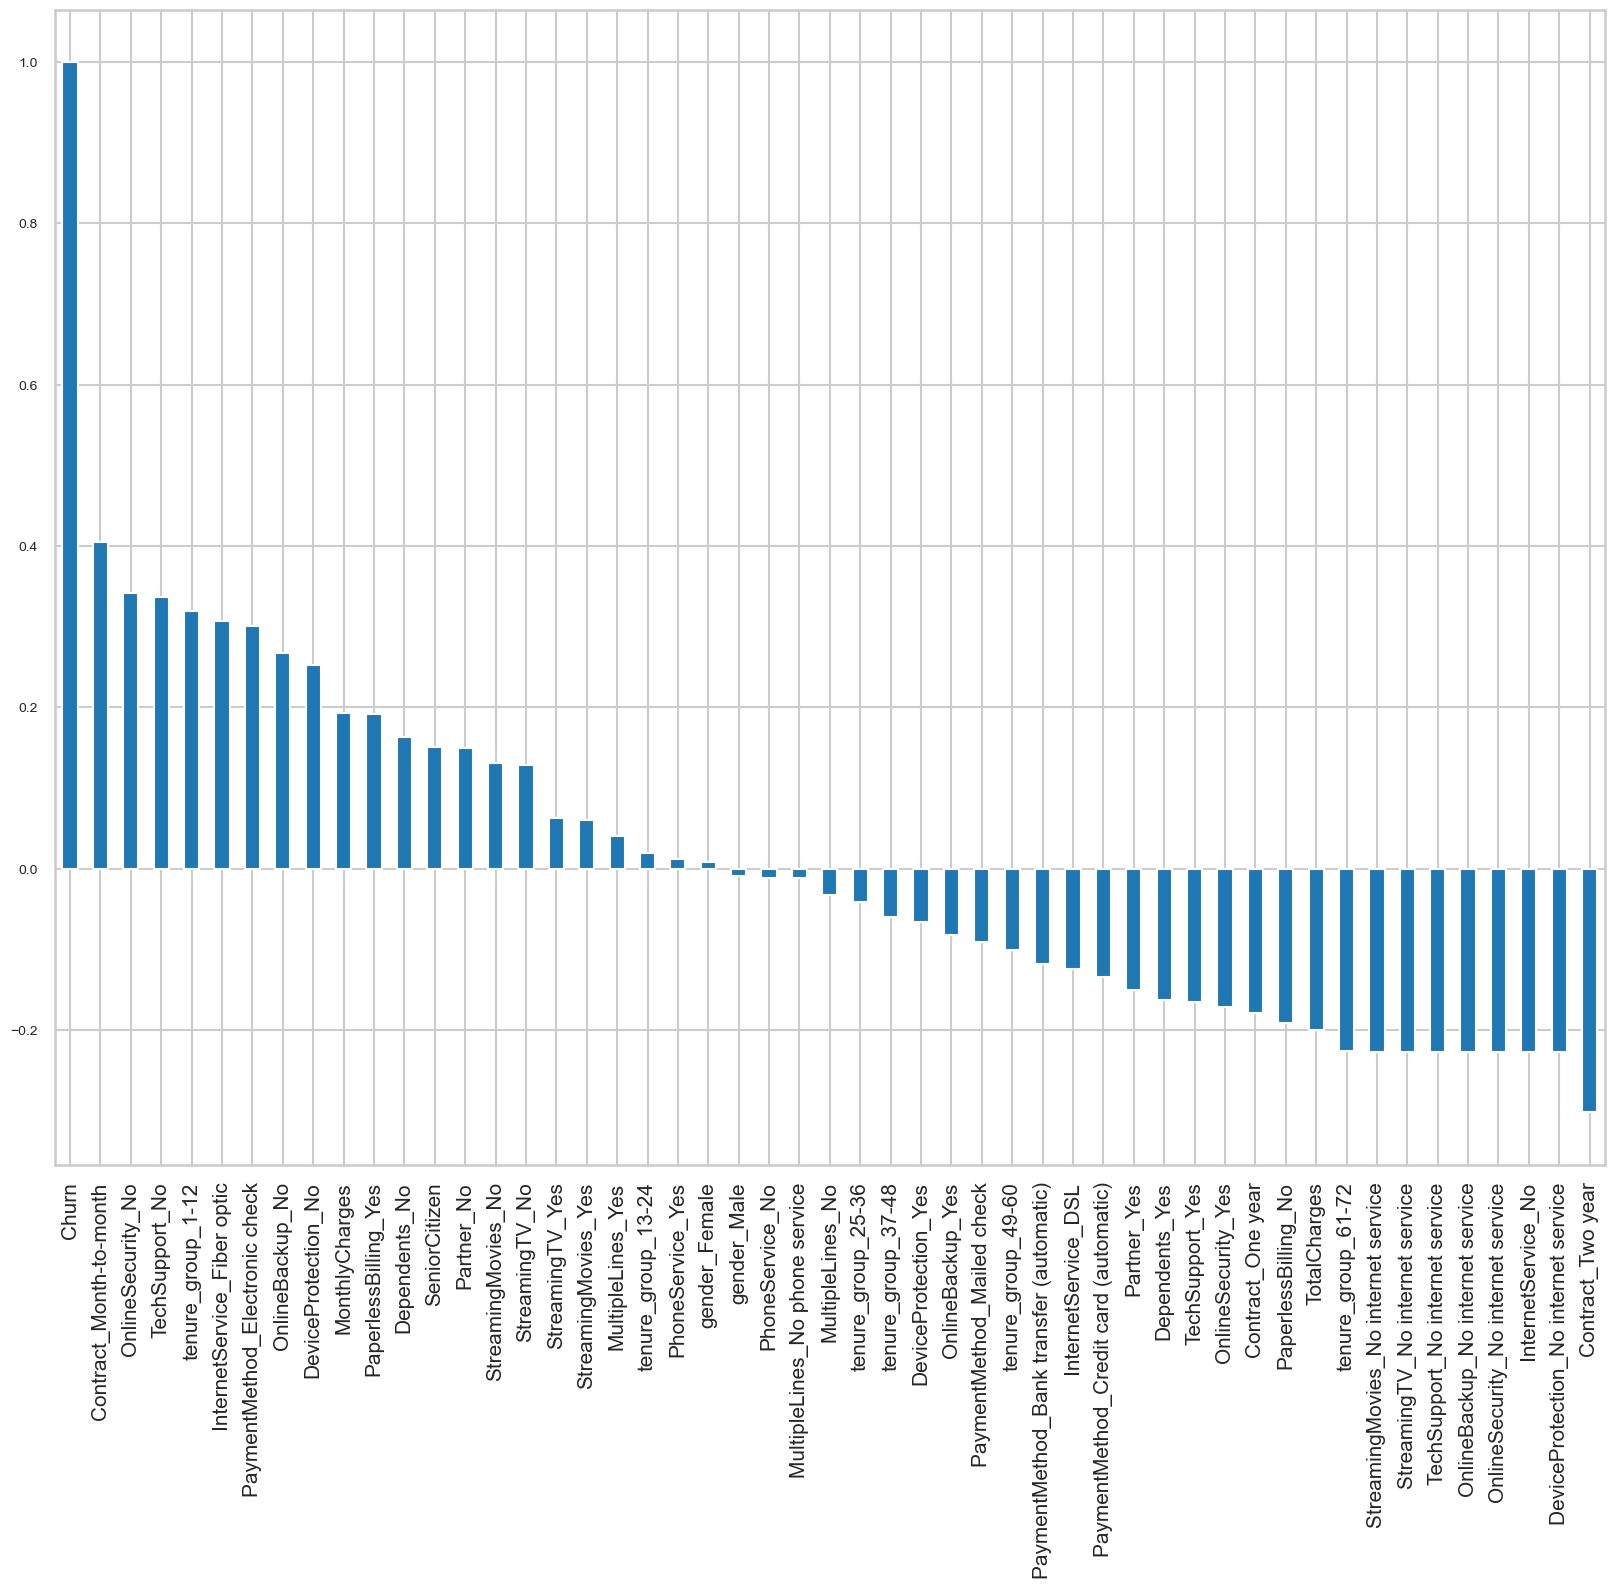

In [123]:
plt.figure(figsize=(20,15))
telco_data_dummies.corr()['Churn'].sort_values(ascending =False).plot(kind="bar", fontsize = 10)
plt.xticks(fontsize=15)
plt.show()

# Derived Insights
**high** Churn seen in case of **Month to month contracts**, **No online security**,**No Tech support**, **First year of subscription** and **Fibre Optics Internet**
**LOW** Churn is seens in case of **Long term contracts, Subscriptions without internet service** and **The customers engaged for 5+ years**

Factors like **Gender, Availability of PhoneService** and **of multiple lines** have almost **NO** impact on Churn

# This is also evident from the **Heatmap** below

<Axes: >

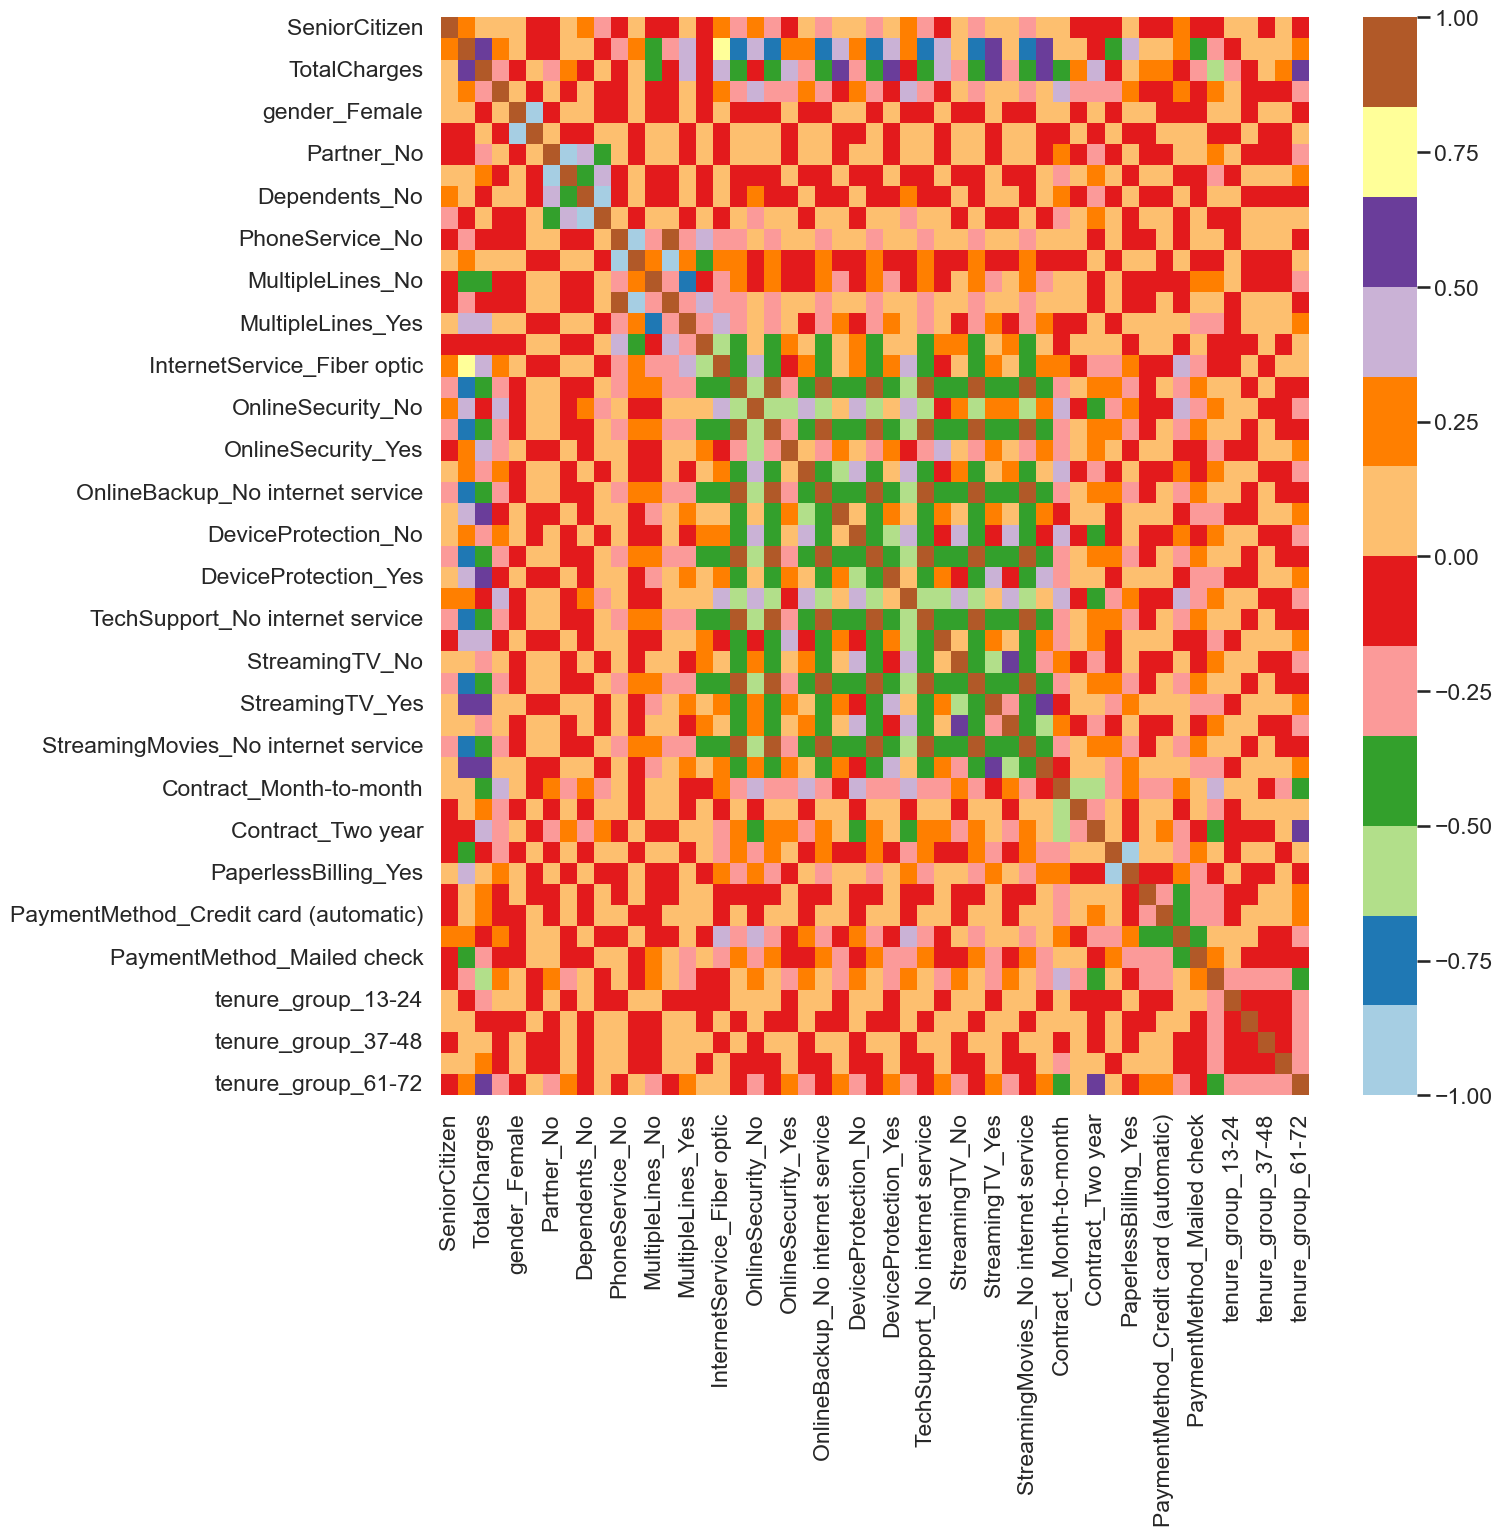

In [124]:
plt.figure(figsize=(14,14))
sns.heatmap(telco_data_dummies.corr(), cmap="Paired")

## Bivariate Analysis

In [125]:
new_df1_target0 = telco_data.loc[telco_data["Churn"]==0]
new_df1_target1 = telco_data.loc[telco_data["Churn"]==1]

In [143]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('linear')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    

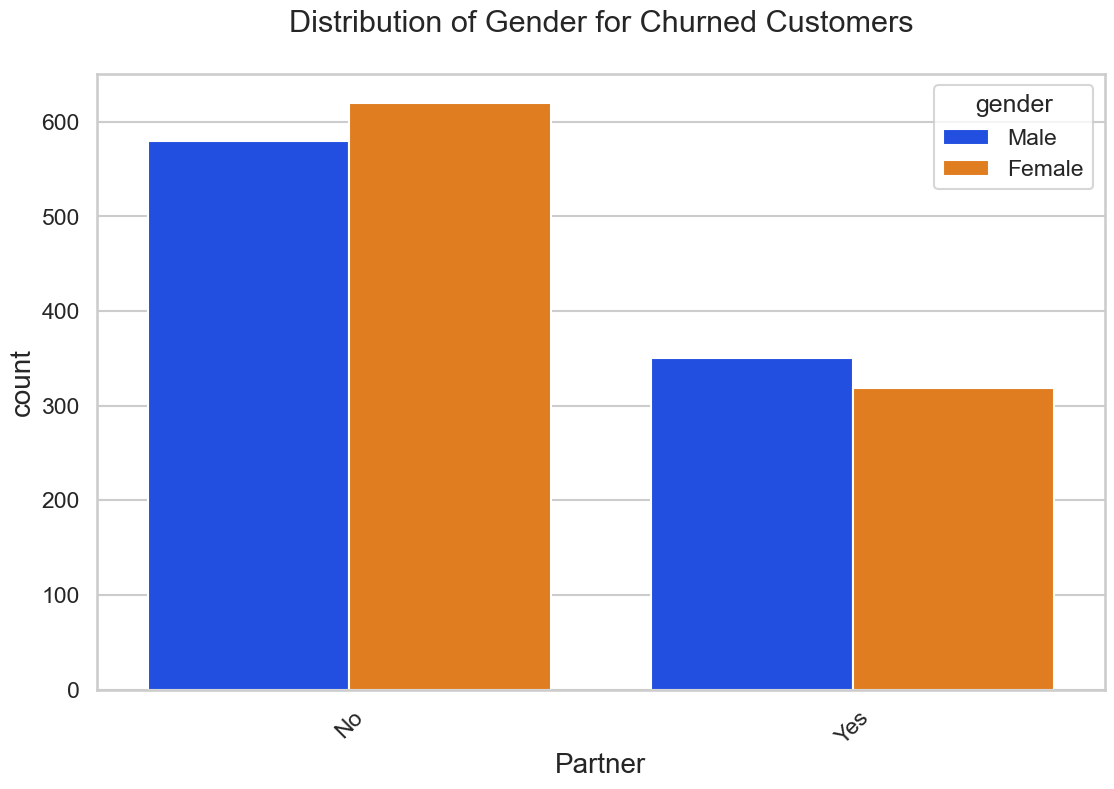

In [144]:
uniplot(new_df1_target1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

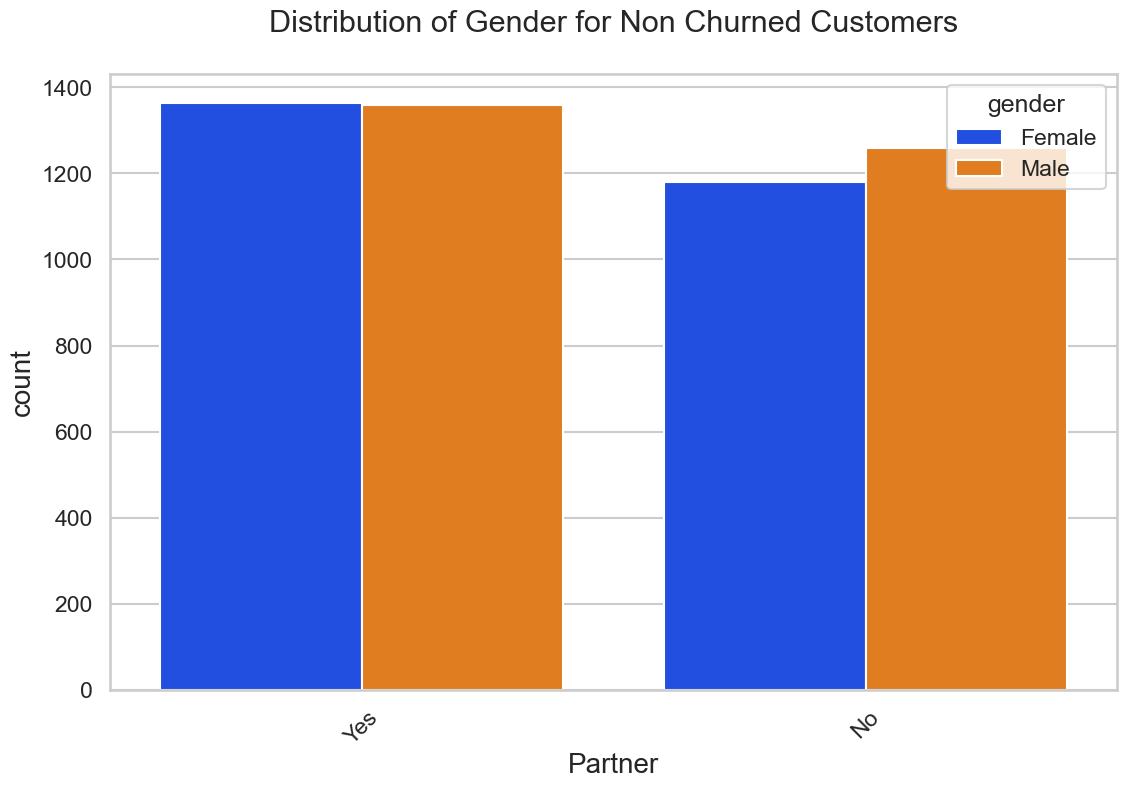

In [145]:
uniplot(new_df1_target0,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')


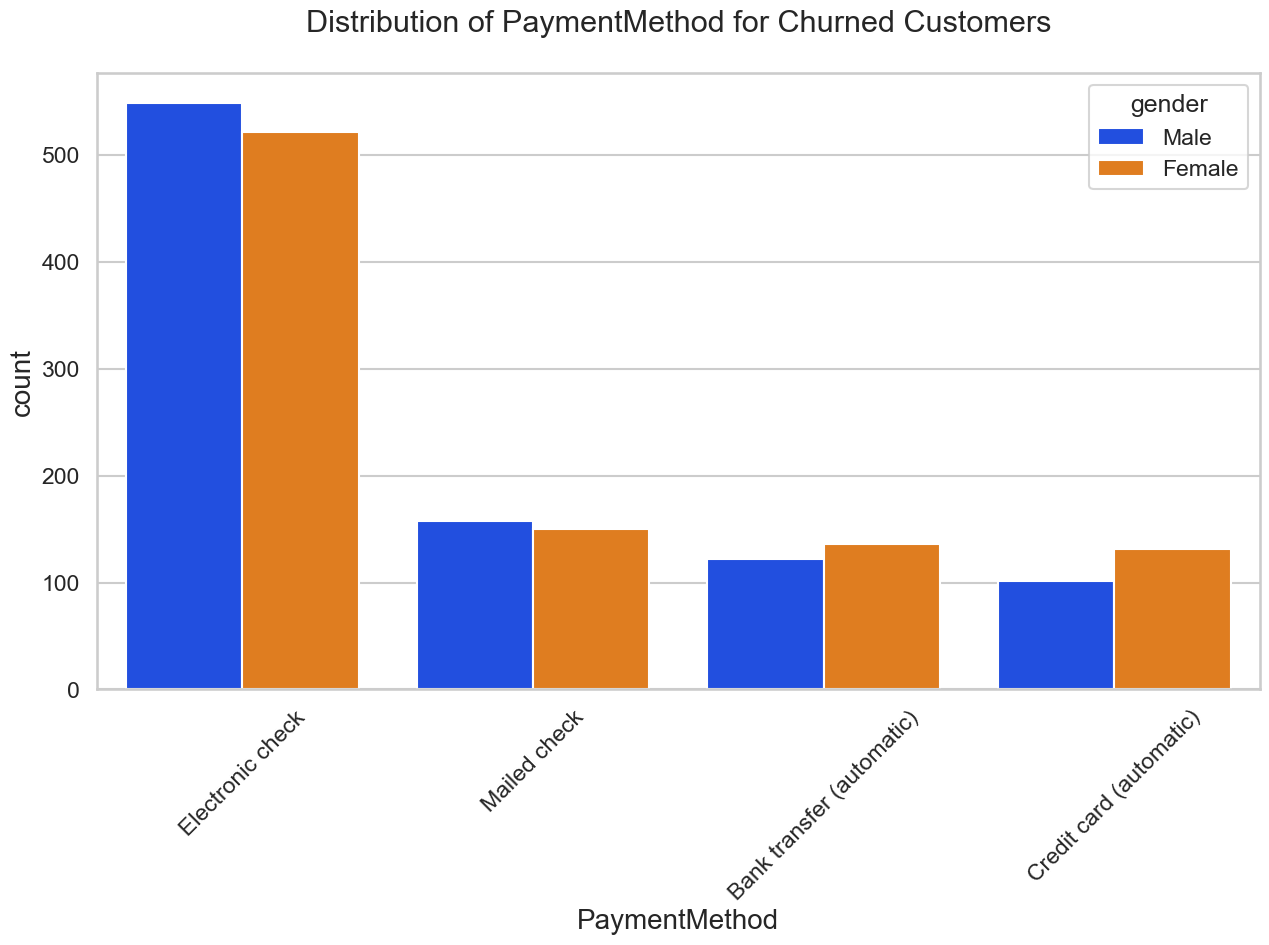

In [146]:
uniplot(new_df1_target1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

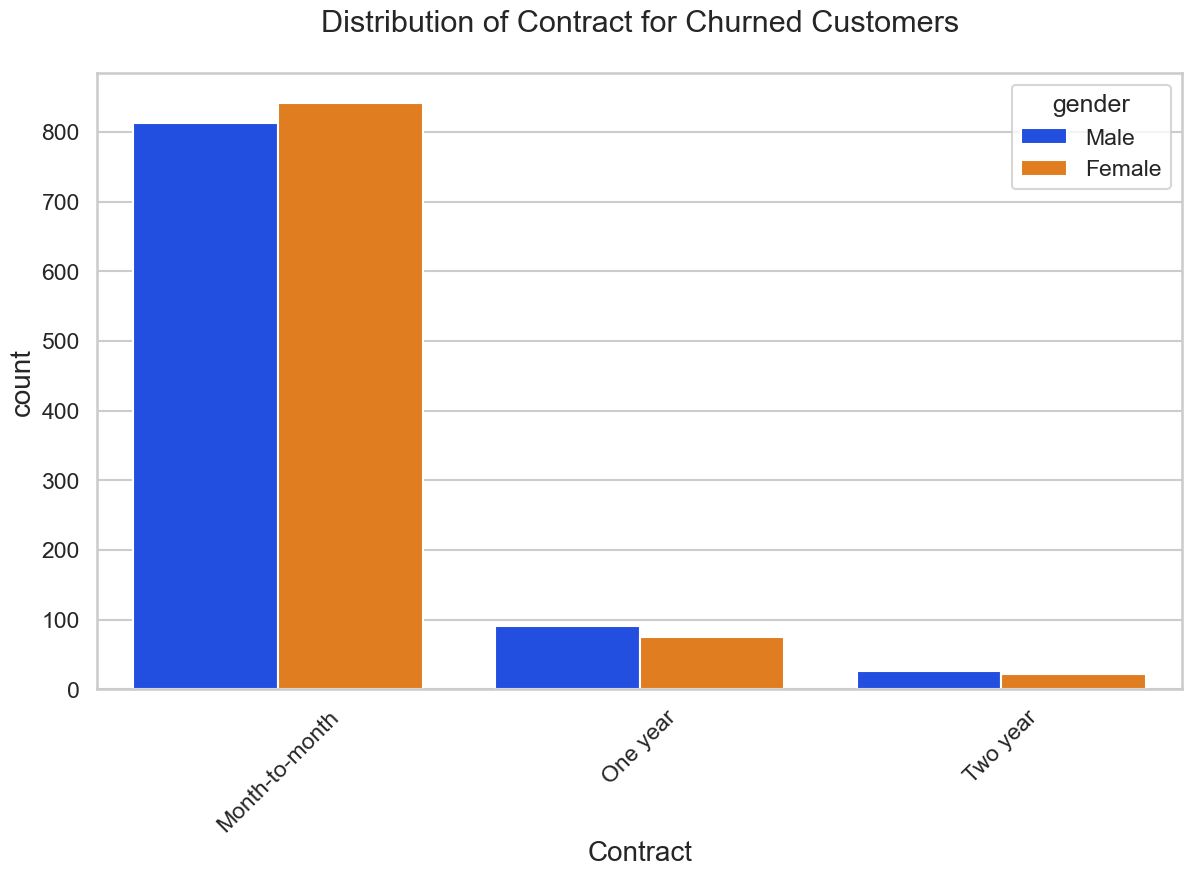

In [147]:
uniplot(new_df1_target1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

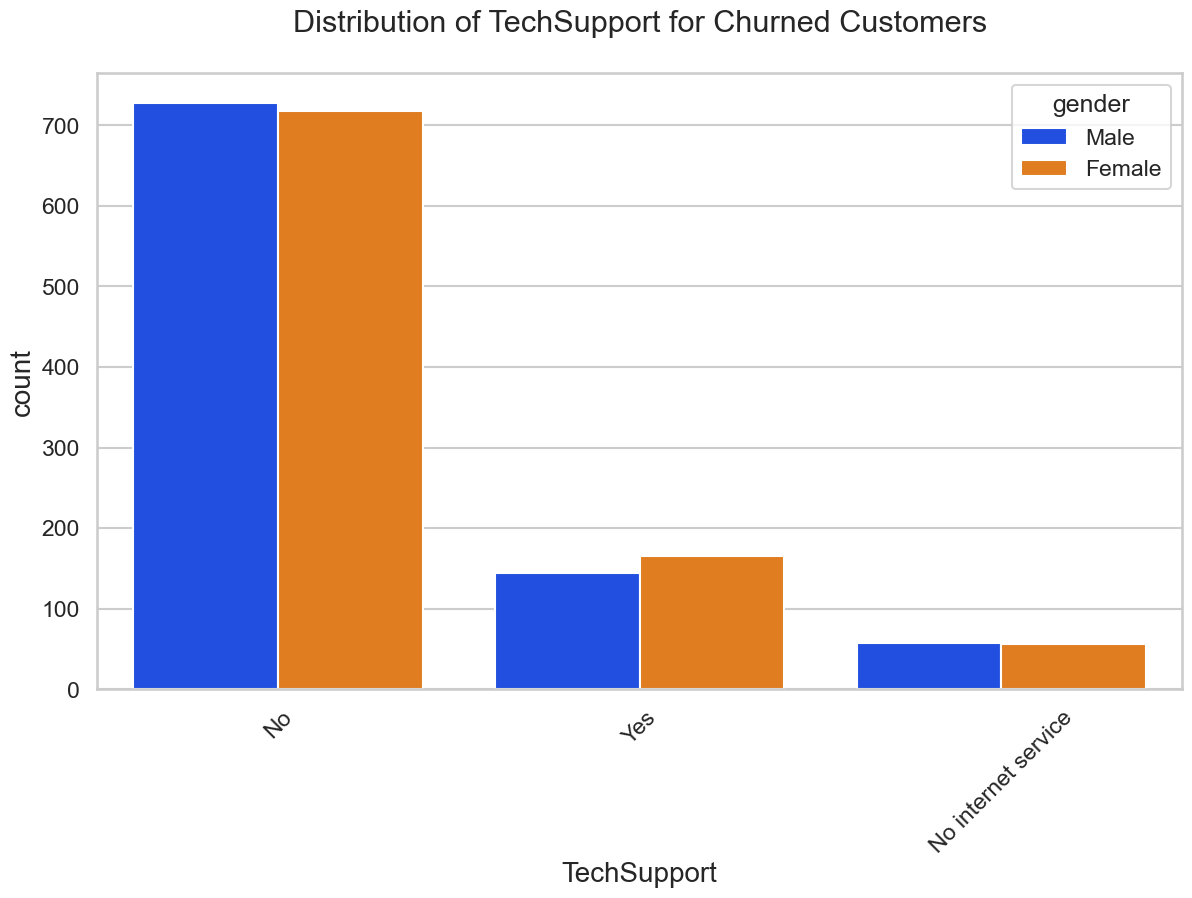

In [148]:
uniplot(new_df1_target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

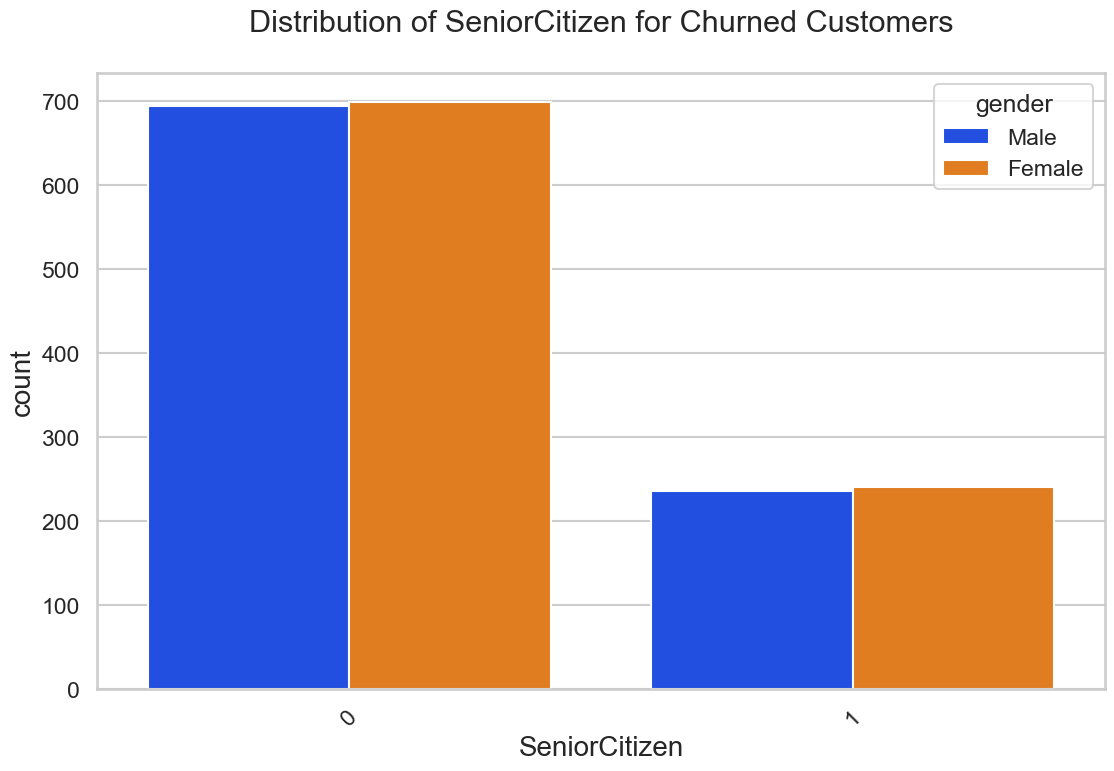

In [149]:
uniplot(new_df1_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

# CONCLUSION
 These are some of the quick insight from this exercise
1. Electronic check medium are the highest churners
2. Contract Type - Monthly customers are more likely to churn because of  no contract terms as they are free to go customers
3. No Online security, No Tech Support category are high churners
4. Non senior Citizens are high churners
 

In [150]:
telco_data_dummies.to_csv('tel_churn.csv')